In [2]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

import GAN

In [3]:
torch.manual_seed(100)

train_data_length = 1024
train_data = torch.zeros((train_data_length,2))
train_data[:,0] = 2*math.pi*torch.rand(train_data_length)
train_data[:,1] = torch.sin(train_data[:,0])
train_labels = torch.zeros(train_data_length)
train_set = [(train_data[i],train_labels[i]) for i in range(train_data_length)]

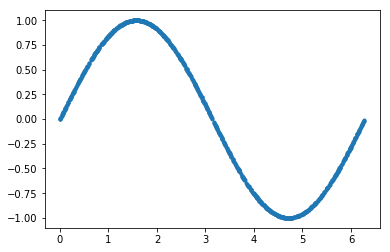

In [4]:
plt.plot(train_data[:,0],train_data[:,1],".")

In [5]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_set,batch_size=batch_size,shuffle=True)

generator = GAN.Generator()
discriminator = GAN.Discriminator()

lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

optimizer_generator = torch.optim.Adam(generator.parameters(),lr=lr)
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(),lr=lr)

In [6]:
for epoch in range(num_epochs):
    for n, (real_samples,_) in enumerate(train_loader):
        real_samples_labels = torch.ones((batch_size,1))
        latent_space_samples = torch.randn((batch_size,2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size,1))
        all_samples = torch.cat((real_samples,generated_samples))
        all_samples_labels = torch.cat((real_samples_labels,generated_samples_labels))

        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(output_discriminator,all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        latent_space_samples = torch.randn((batch_size,2))

        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(output_discriminator_generated,real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()

        if epoch % 10 == 0 and n == batch_size - 1:
            print "Epoch: %i Loss D.: %f"%(epoch,loss_discriminator)
            print "Epoch: %i Loss G.: %f"%(epoch,loss_generator)

Epoch: 0 Loss D.: 0.136029
Epoch: 0 Loss G.: 2.367833
Epoch: 10 Loss D.: 0.623182
Epoch: 10 Loss G.: 1.329750
Epoch: 20 Loss D.: 0.671042
Epoch: 20 Loss G.: 1.000374
Epoch: 30 Loss D.: 0.655065
Epoch: 30 Loss G.: 0.778902
Epoch: 40 Loss D.: 0.723470
Epoch: 40 Loss G.: 0.871489
Epoch: 50 Loss D.: 0.680701
Epoch: 50 Loss G.: 0.725581
Epoch: 60 Loss D.: 0.663409
Epoch: 60 Loss G.: 0.831605
Epoch: 70 Loss D.: 0.625131
Epoch: 70 Loss G.: 0.788848
Epoch: 80 Loss D.: 0.670299
Epoch: 80 Loss G.: 0.785628
Epoch: 90 Loss D.: 0.648611
Epoch: 90 Loss G.: 0.771029
Epoch: 100 Loss D.: 0.696849
Epoch: 100 Loss G.: 0.672707
Epoch: 110 Loss D.: 0.653999
Epoch: 110 Loss G.: 0.680119
Epoch: 120 Loss D.: 0.708382
Epoch: 120 Loss G.: 0.692385
Epoch: 130 Loss D.: 0.692276
Epoch: 130 Loss G.: 0.686743
Epoch: 140 Loss D.: 0.696464
Epoch: 140 Loss G.: 0.692108
Epoch: 150 Loss D.: 0.690968
Epoch: 150 Loss G.: 0.697679
Epoch: 160 Loss D.: 0.704800
Epoch: 160 Loss G.: 0.680306
Epoch: 170 Loss D.: 0.698798
Epoch: 

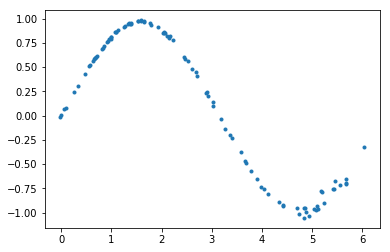

In [7]:
latent_space_samples = torch.randn(100,2)
generated_samples = generator(latent_space_samples)

generated_samples = generated_samples.detach()
plt.plot(generated_samples[:,0],generated_samples[:,1],".")